In [4]:
import json
import pickle
import pymongo
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
# import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

# FOR DATA PREPARATION
import data_pre_processing_module as dp
plot_width = 15
plot_height =10

model = keras.models.load_model(r"D:\NGen Project files\3_Predictive Maintenance\github repos\Alert_generation_and_interlocking\Models\Press 24\p24_all_lube_psi_20240220.keras")


Batch information : {2: ['lub_flConRod_psi', 'lub_rlConRodIn_psi', 'lub_frLwrLnkIn_psi', 'lub_flLwrLnkIn_psi', 'lub_rrLwrLnkIn_psi', 'lub_rlLwrLnkIn_psi'], 3: ['lub_frConRodIn_psi', 'lub_rearBlk_psi'], 4: ['lub_rrConRodIn_psi', 'lub_preFltr_psi', 'lub_postFltr_psi']}
--> Shape of the data: batch_size=1070, time_steps=19, features=12
Batch information : {2: ['lub_flConRod_psi', 'lub_rlConRodIn_psi', 'lub_frLwrLnkIn_psi', 'lub_flLwrLnkIn_psi', 'lub_rrLwrLnkIn_psi', 'lub_rlLwrLnkIn_psi'], 3: ['lub_frConRodIn_psi', 'lub_rearBlk_psi'], 4: ['lub_rrConRodIn_psi', 'lub_preFltr_psi', 'lub_postFltr_psi']}
--> Shape of the data: batch_size=4160, time_steps=19, features=12
Batch information : {2: ['lub_flConRod_psi', 'lub_rlConRodIn_psi', 'lub_frLwrLnkIn_psi', 'lub_flLwrLnkIn_psi', 'lub_rrLwrLnkIn_psi', 'lub_rlLwrLnkIn_psi'], 3: ['lub_frConRodIn_psi', 'lub_rearBlk_psi']}
--> Shape of the data: batch_size=6153, time_steps=19, features=12
Batch information : {2: ['lub_flConRod_psi', 'lub_rlConRodIn_

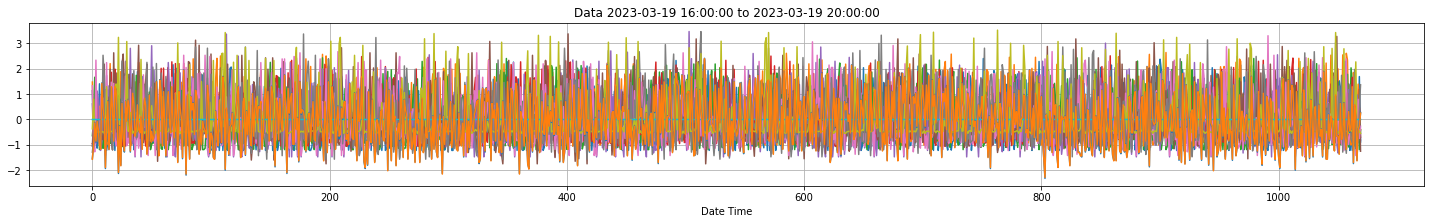

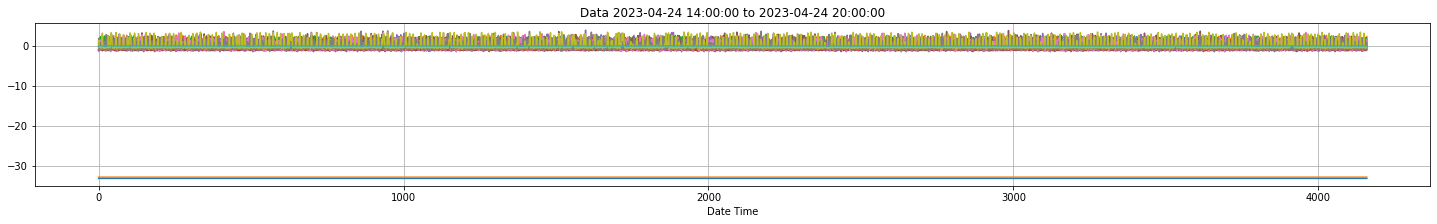

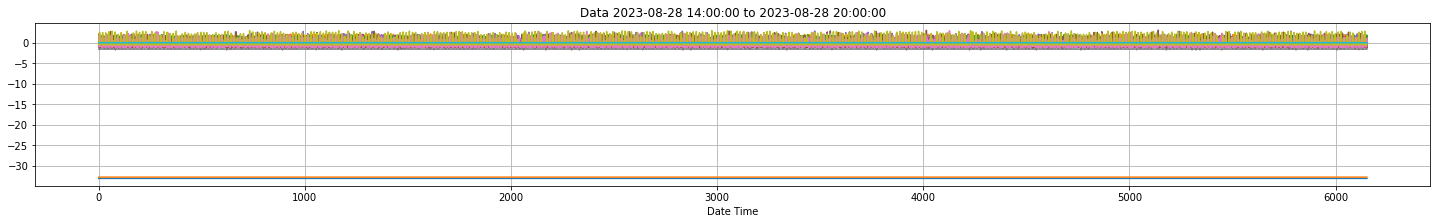

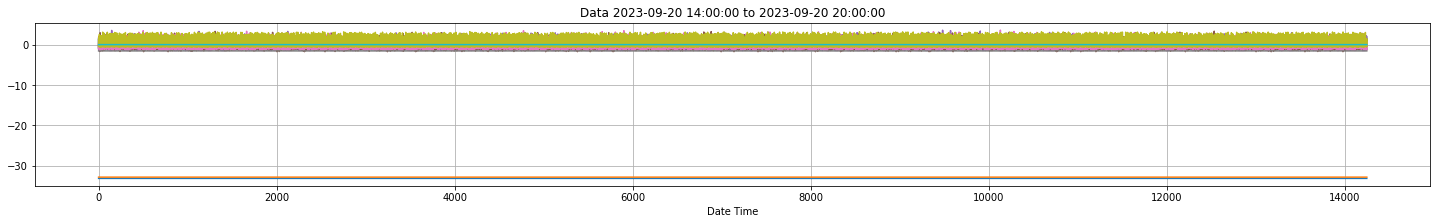

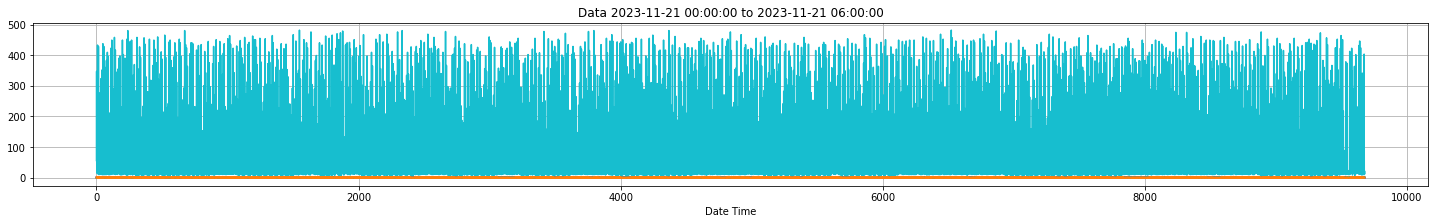

In [2]:
#LOAD TRAIN AND TEST DATA
#=============
# X_Train
#=============
start           = datetime(2023,3,19,16,0,0)
end             = datetime(2023,3,19,20,0,0)
# column_list     = ["hyd_unitMain_psi"] 
column_list     = ["lub_flConRod_psi","lub_frConRodIn_psi","lub_rlConRodIn_psi","lub_rrConRodIn_psi",
                            "lub_frLwrLnkIn_psi","lub_flLwrLnkIn_psi","lub_rrLwrLnkIn_psi","lub_rlLwrLnkIn_psi",
                            "lub_rearBlk_psi","lub_frontBlk_psi","lub_preFltr_psi","lub_postFltr_psi"] 
n_steps         = 19
press_number    = 24
ob              = dp.data_pre_processing()
ob.set_values(start,end,n_steps,column_list)
X,df = ob.mongodb_to_X()
X_train = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape) # Scaling of the data
plt.figure(figsize=(25,3))
plt.plot(X_train[:,0])
plt.title(f"Data {start} to {end}")
plt.xlabel("Date Time")
# plt.ylabel(column) 
plt.grid(True)


# TEST DATA 1
start = datetime(2023,4,24,14,0,0)
end   = datetime(2023,4,24,20,0,0)
ob              = dp.data_pre_processing()
ob.set_values(start,end,n_steps,column_list)
X,df = ob.mongodb_to_X()  
X_test_1 = scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
plt.figure(figsize=(25,3))
plt.plot(X_test_1[:,0])
plt.title(f"Data {start} to {end}")
plt.xlabel("Date Time")
# plt.ylabel(column) 
plt.grid(True)

# TEST DATA 2
start = datetime(2023,8,28,14,0,0)
end   = datetime(2023,8,28,20,0,0) 
ob              = dp.data_pre_processing()
ob.set_values(start,end,n_steps,column_list)
X,df = ob.mongodb_to_X()  
X_test_2 = scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
plt.figure(figsize=(25,3))
plt.plot(X_test_2[:,0])
plt.title(f"Data {start} to {end}")
plt.xlabel("Date Time")
# plt.ylabel(column) 
plt.grid(True)

# TEST DATA 3
start = datetime(2023,9,20,14,0,0)
end   = datetime(2023,9,20,20,0,0) 
ob              = dp.data_pre_processing()
ob.set_values(start,end,n_steps,column_list)
X,df = ob.mongodb_to_X()  
X_test_3 = scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
plt.figure(figsize=(25,3))
plt.plot(X_test_3[:,0])
plt.title(f"Data {start} to {end}")
plt.xlabel("Date Time")
# plt.ylabel(column) 
plt.grid(True)

# TEST DATA 4
start = datetime(2023,11,21,0,0,0)
end   = datetime(2023,11,21,6,0,0) 
ob              = dp.data_pre_processing()
ob.set_values(start,end,n_steps,column_list)
X,df = ob.mongodb_to_X()  
X_test_4 = scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
plt.figure(figsize=(25,3))
plt.plot(X_test_4[:,0])
plt.title(f"Data {start} to {end}")
plt.xlabel("Date Time")
# plt.ylabel(column) 
plt.grid(True)


# Model Evaluation

test_data shape (35313, 19, 12)
predictions shape (35313, 19, 12)


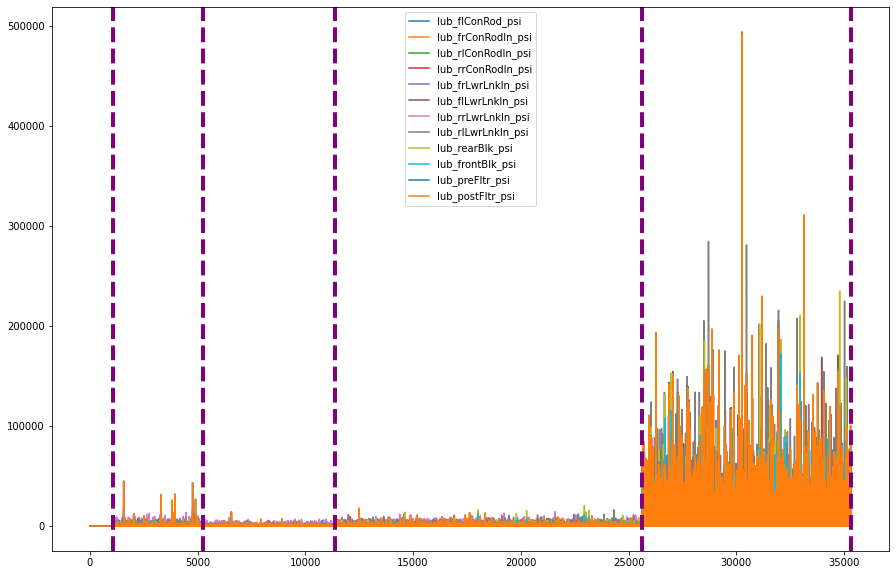

In [3]:
def predict(model, test_data):
    # Use LSTM Autoencoder model to predict on test data.
    predictions = model.predict(test_data)
    return predictions

def calculate_error(test_data, predictions):
    """Calculate mean squared error between test data and predictions."""
    print("test_data shape", test_data.shape)
    print("predictions shape", predictions.shape)
    mse = np.mean(np.square(test_data - predictions), axis=1)
    mae = np.mean(np.abs(test_data - predictions), axis=1)
    return [mse,mae]

def test_model(data):
    # model = keras.models.load_model('LSTMautoencoders')
    # plt.figure(figsize=(plot_width,plot_height))
    trainPredict    = predict(model, data)
    trainMSE        = calculate_error(data, trainPredict)[0]
    df_columns_list = list(df.columns)
    range_start=0
    range_end = len(df_columns_list)
    plt.figure(figsize=(plot_width,plot_height))
    for i in range(range_start,range_end):
        plt.plot(trainMSE[:,i],label=df_columns_list[i])

full_test_sample = np.concatenate((X_train,X_test_1,X_test_2,X_test_3,X_test_4),axis=0)
test_model(full_test_sample)
#Vertical lines 
plt.axvline(x=len(X_train),color='purple',ls="--",lw=4)
plt.axvline(x=len(X_train)+len(X_test_1),color='purple',ls="--",lw=4)
plt.axvline(x=len(X_train)+len(X_test_1)+len(X_test_2),color='purple',ls="--",lw=4)
plt.axvline(x=len(X_train)+len(X_test_1)+len(X_test_2)+len(X_test_3),color='purple',ls="--",lw=4)
plt.axvline(x=len(X_train)+len(X_test_1)+len(X_test_2)+len(X_test_3)+len(X_test_4),color='purple',ls="--",lw=4)
plt.legend()
# plt.ylim(0,30)

test_data shape (35313, 19, 1)
predictions shape (35313, 19, 1)


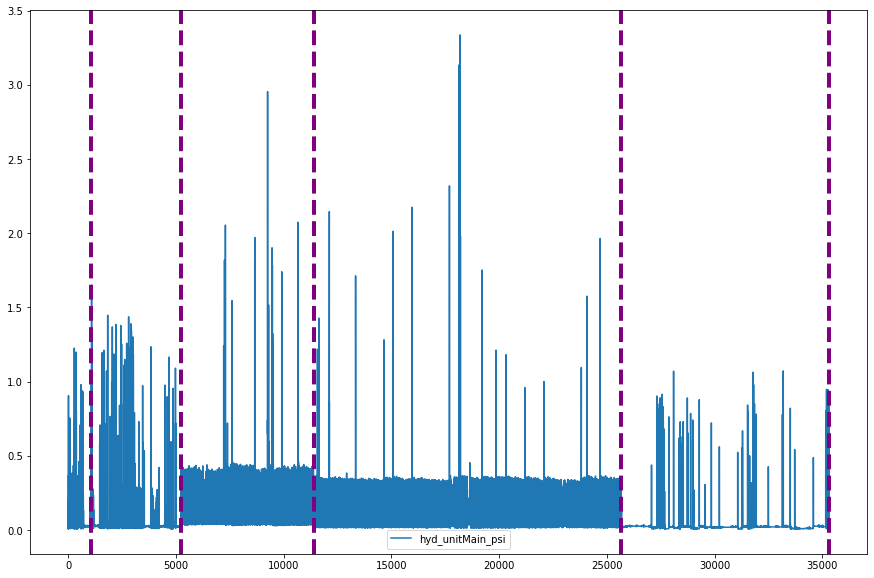

In [22]:

def test_model(data):
    # model = keras.models.load_model('LSTMautoencoders')
    # plt.figure(figsize=(plot_width,plot_height))
    trainPredict    = predict(model, data)
    trainMSE        = calculate_error(data, trainPredict)[1]
    df_columns_list = list(df.columns)
    range_start=0
    range_end = len(df_columns_list)
    plt.figure(figsize=(plot_width,plot_height))
    for i in range(range_start,range_end):
        plt.plot(trainMSE[:,i],label=df_columns_list[i])

full_test_sample = np.concatenate((X_train,X_test_1,X_test_2,X_test_3,X_test_4),axis=0)
test_model(full_test_sample)
#Vertical lines 
plt.axvline(x=len(X_train),color='purple',ls="--",lw=4)
plt.axvline(x=len(X_train)+len(X_test_1),color='purple',ls="--",lw=4)
plt.axvline(x=len(X_train)+len(X_test_1)+len(X_test_2),color='purple',ls="--",lw=4)
plt.axvline(x=len(X_train)+len(X_test_1)+len(X_test_2)+len(X_test_3),color='purple',ls="--",lw=4)
plt.axvline(x=len(X_train)+len(X_test_1)+len(X_test_2)+len(X_test_3)+len(X_test_4),color='purple',ls="--",lw=4)
plt.legend()
# plt.ylim(0,30)

There is not much different between mse and mae.

In [26]:
for data in [X_train,X_test_1,X_test_2,X_test_3,X_test_4]:
    trainPredict    = predict(model,data)
    trainMSE        = calculate_error(data, trainPredict)
    if trainMSE[0].max()>4: # MSE = 4 is the limit for anomalies.
        print("Anomalies encountered",trainMSE[0].max())

test_data shape (1070, 19, 1)
predictions shape (1070, 19, 1)
test_data shape (4160, 19, 1)
predictions shape (4160, 19, 1)
test_data shape (6153, 19, 1)
predictions shape (6153, 19, 1)
Anomalies encountered 10.314354017501097
test_data shape (14250, 19, 1)
predictions shape (14250, 19, 1)
Anomalies encountered 25.195711152924957
test_data shape (9680, 19, 1)
predictions shape (9680, 19, 1)


In [31]:
# Run above for March 19 onwards to know the patterns
start           = datetime(2023,3,19,16,0,0)
end             = datetime(2023,3,19,20,0,0)
column_list     = ["hyd_unitMain_psi"] 
n_steps         = 19
press_number    = 24
ob              = dp.data_pre_processing()
ob.set_values(start,end,n_steps,column_list)
X,df = ob.mongodb_to_X()
X_train = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape) # Scaling of the data
for month in range(3,13):
    print(month)
    try:
        start           = datetime(2023,month,19,16,0,0)
        end             = datetime(2023,month,19,20,0,0)
        column_list     = ["hyd_unitMain_psi"] 
        n_steps         = 19
        press_number    = 24
        ob              = dp.data_pre_processing()
        ob.set_values(start,end,n_steps,column_list)
        X,df = ob.mongodb_to_X()
        data = scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        trainPredict    = predict(model,data)
        trainMSE        = calculate_error(data, trainPredict)
        if trainMSE[0].max()>4: # MSE = 4 is the limit for anomalies.
            print("Anomalies encountered",trainMSE[0].max())
        
    except Exception as e:
        print(e)


hyd_unitMain_psi
{2: ['hyd_unitMain_psi']}
Number of documents in database before downtime filter: 108290
Number of documents in database after downtime filter: 20340
Number of documents in database before downtime filter: 108290
Number of documents in database after downtime filter: 20340
--> Shape of the data: batch_size=1070, time_steps=19, features=1
3
hyd_unitMain_psi
{2: ['hyd_unitMain_psi']}
Number of documents in database before downtime filter: 108290
Number of documents in database after downtime filter: 20340
Number of documents in database before downtime filter: 108290
Number of documents in database after downtime filter: 20340
--> Shape of the data: batch_size=1070, time_steps=19, features=1
test_data shape (1070, 19, 1)
predictions shape (1070, 19, 1)
4
hyd_unitMain_psi
{2: ['hyd_unitMain_psi']}
Number of documents in database before downtime filter: 242297
Number of documents in database after downtime filter: 72319
Number of documents in database before downtime filte

In [2]:
def predict(model, test_data):
    # Use LSTM Autoencoder model to predict on test data.
    predictions = model.predict(test_data)
    return predictions

def calculate_error(test_data, predictions):
    """Calculate mean squared error between test data and predictions."""
    print("test_data shape", test_data.shape)
    print("predictions shape", predictions.shape)
    mse = np.mean(np.square(test_data - predictions), axis=1)
    mae = np.mean(np.abs(test_data - predictions), axis=1)
    return [mse,mae]
# Run above for March 19 onwards to know the patterns
import data_pre_processing_module as dp
model = keras.models.load_model(r"D:\NGen Project files\3_Predictive Maintenance\github repos\Alert_generation_and_interlocking\hydpressure.keras")
start           = datetime(2023,3,19,16,0,0)
end             = datetime(2023,3,19,20,0,0)
column_list     = ["hyd_unitMain_psi"] 
n_steps         = 19
press_number    = 24
ob              = dp.data_pre_processing()
ob.set_values(start,end,n_steps,column_list)
X,df = ob.mongodb_to_X()
X_train = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape) # Scaling of the data
# Save scaler
import pickle as pkl
with open("hyd_unitMain_psi.pkl", "wb") as outfile:
    pkl.dump(scaler, outfile)
for month in range(1,3):
    print(month)
    try:
        start           = datetime(2024,month,13,16,0,0)
        end             = datetime(2024,month,13,20,0,0)
        column_list     = ["hyd_unitMain_psi"] 
        n_steps         = 19
        press_number    = 24
        ob              = dp.data_pre_processing()
        ob.set_values(start,end,n_steps,column_list)
        X,df = ob.mongodb_to_X()
        data = scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        trainPredict    = predict(model,data)
        trainMSE        = calculate_error(data, trainPredict)
        if trainMSE[0].max()>4: # MSE = 4 is the limit for anomalies.
            print("Anomalies encountered",trainMSE[0].max())
            
    except Exception as e:
        print(e)


hyd_unitMain_psi
{2: ['hyd_unitMain_psi']}
Number of documents in database before downtime filter: 108290
Number of documents in database after downtime filter: 20340
Number of documents in database before downtime filter: 108290
Number of documents in database after downtime filter: 20340
--> Shape of the data: batch_size=1070, time_steps=19, features=1
1
hyd_unitMain_psi
find_collection exception no such item for Cursor instance
{1: ['hyd_unitMain_psi']}
Number of documents in database before downtime filter: 480004
Number of documents in database after downtime filter: 269979
Number of documents in database before downtime filter: 480004
Number of documents in database after downtime filter: 269979
--> Shape of the data: batch_size=14209, time_steps=19, features=1
test_data shape (14209, 19, 1)
predictions shape (14209, 19, 1)
2
hyd_unitMain_psi
find_collection exception no such item for Cursor instance
{1: ['hyd_unitMain_psi']}
Number of documents in database before downtime filter